In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
mpl.rcParams['figure.dpi']= 300

In [477]:
base_swflow= pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_mullFlow_2017toMay_5m_utc_gpm.csv',
                         index_col = 0, names=['time_utc', 'flow'])
base_swSWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_mullSWT_2017toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_swRWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_mullRWT_2017toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_OAT_2017toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_solarGlob = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/csl_solarGlob_2017toMay_5m_utc_wpm2.csv',
                         index_col = 0, names=['time_utc', 'solarRad'])
base_iatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_IAT_2017FebtoMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_wsRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_WS_2017FebtoMay_5m_utc_mph.csv',
                         index_col = 0, names=['time_utc', 'ws'])



rl_swflow= pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_mullFlow_2018Feb6toMay_5m_utc_gpm.csv',
                         index_col = 0, names=['time_utc', 'flow'])
rl_swSWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_mullSWT_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_swRWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_mullRWT_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/csl_OAT_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_solarGlob = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/csl_solarGlob_2018Feb6toMay_5m_utc_wpm2.csv',
                         index_col = 0, names=['time_utc', 'solarRad'])
rl_iatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_iat_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_wsRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_WS_2018Feb6toMay_5m_utc_mph.csv',
                         index_col = 0, names=['time_utc', 'ws'])

base_1617_swflow= pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_mullFlow_201617Heating_5m_utc_gpm.csv',
                         index_col = 0, names=['time_utc', 'flow'])
base_1617_swSWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_mullSWT_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_swRWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_mullRWT_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iwcslCmbd_oat_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_solarGlob = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/csl_solarGlob_201617Heating_5m_utc_wpm2.csv',
                         index_col = 0, names=['time_utc', 'solarRad'])
base_1617_iatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_iat_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_wsRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_ws_201617Heating_5m_utc_mph.csv',
                         index_col = 0, names=['time_utc', 'ws'])

base_2017_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/csliwCmbd_OAT_2017to2018Jan_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])

dp = pd.DataFrame()

In [475]:
base_1617_oatRaw

,temp
time_utc,
2016-11-01T04:05:00Z,43.200000
2016-11-01T04:10:00Z,42.733345
2016-11-01T04:15:00Z,42.883320
2016-11-01T04:20:00Z,42.716682
2016-11-01T04:25:00Z,43.000000
2016-11-01T04:30:00Z,42.849920
2016-11-01T04:35:00Z,42.383278
2016-11-01T04:40:00Z,42.116680
2016-11-01T04:45:00Z,42.316708


In [436]:
def getHeatingEnergy(swflow, swt, rwt, min_int = 1):
    htEnergyDf = pd.DataFrame();
    htEnergyDf['energy'] = 4.187 * swflow['flow'] * 0.06309020 * ((swt['temp'] - 32)/1.8 - (rwt['temp']-32)/1.8) * (min_int/60.0)
    htEnergyDf[htEnergyDf < 0] = 0
    timeIdx = pd.to_datetime(htEnergyDf.index).tz_localize('utc').tz_convert('US/Eastern')
    htEnergyDf.set_index(timeIdx, inplace = True)
    return htEnergyDf;

def getOAT(oatRaw):
    oat = pd.DataFrame();
    oat['temp'] = (oatRaw['temp'] - 32.0)/1.8
    timeIdx = pd.to_datetime(oat.index).tz_localize('utc').tz_convert('US/Eastern')
    oat.set_index(timeIdx, inplace = True)
    return oat;

def getWS(wsRaw):
    ws = pd.DataFrame();
    ws['ws'] = wsRaw['ws'] * 0.44704
    timeIdx = pd.to_datetime(ws.index).tz_localize('utc').tz_convert('US/Eastern')
    ws.set_index(timeIdx, inplace = True)
    return ws;

def getSolarGlob(solarGlobRaw):
    solarGlob = pd.DataFrame();
    solarGlob['solarRad'] = solarGlobRaw['solarRad']
    timeIdx = pd.to_datetime(solarGlob.index).tz_localize('utc').tz_convert('US/Eastern')
    solarGlob.set_index(timeIdx, inplace = True)
    return solarGlob;
    

In [484]:
base_energy = getHeatingEnergy(base_swflow, base_swSWT, base_swRWT, 5)
rl_energy = getHeatingEnergy(rl_swflow, rl_swSWT, rl_swRWT, 5)
base_oat = getOAT(base_oatRaw)
rl_oat = getOAT(rl_oatRaw)
base_solarGlob = getSolarGlob(base_solarGlob)
rl_solarGlob = getSolarGlob(rl_solarGlob)
base_iat = getOAT(base_iatRaw)
rl_iat = getOAT(rl_iatRaw)
base_ws = getWS(base_wsRaw)
rl_ws = getWS(rl_wsRaw)

base_2017_oat = getOAT(base_2017_oatRaw)

base_1617_energy = getHeatingEnergy(base_1617_swflow, base_1617_swSWT, base_1617_swRWT, 5)
base_1617_oat = getOAT(base_1617_oatRaw)
base_1617_solarGlob = getSolarGlob(base_1617_solarGlob)
base_1617_iat = getOAT(base_1617_iatRaw)
base_1617_ws = getWS(base_1617_wsRaw)



TypeError: Already tz-aware, use tz_convert to convert.

In [485]:
base_1617_all = pd.concat([base_1617_oat, base_1617_solarGlob, base_1617_ws, base_1617_iat, base_1617_energy], axis=1)
base_1617

In [497]:
base_1617_all_list = [base_1617_oat, base_1617_solarGlob, base_1617_ws, base_1617_iat, base_1617_energy]
base_1617_all_aggList = [];
for i in range(len(base_1617_all_list)):
    aggDf = pd.DataFrame();
    orgDf = base_1617_all_list[1]
    colName = orgDf.columns.values[0]
    if i < len(base_1617_all_list) - 1:
        aggDf[colName] = orgDf[colName].resample('D').mean()
    else:
        aggDf[colName] = orgDf[colName].resample('D').sum()
    base_1617_all_aggList.append(aggDf)


In [499]:
base_1617_all_aggList[4]

,solarRad
time_utc,
2016-11-01 00:00:00-04:00,30134.329457
2016-11-02 00:00:00-04:00,36017.185616
2016-11-03 00:00:00-04:00,12191.748560
2016-11-04 00:00:00-04:00,41473.487949
2016-11-05 00:00:00-04:00,42134.308203
2016-11-06 00:00:00-04:00,39367.617974
2016-11-07 00:00:00-05:00,41475.051917
2016-11-08 00:00:00-05:00,30387.008031
2016-11-09 00:00:00-05:00,7766.482729


In [438]:
base_energy = base_energy[base_energy.index.month > 1]
base_energy = base_energy[base_energy.index.month < 5]
base_oat = base_oat[base_oat.index.month > 1]
base_oat = base_oat[base_oat.index.month < 5]
base_solarGlob = base_solarGlob[base_solarGlob.index.month > 1]
base_solarGlob = base_solarGlob[base_solarGlob.index.month < 5]

rl_energy = rl_energy[rl_energy.index.month < 5]
rl_oat = rl_oat[rl_oat.index.month < 5]
rl_solarGlob = rl_solarGlob[rl_solarGlob.index.month < 5]
rl_iat = rl_iat[rl_iat.index.month < 5]

In [494]:
base_1617_oat.columns.values[0]

'temp'

In [439]:
rl_ws

,ws
time_utc,
2018-02-06 00:05:00-05:00,0.000000
2018-02-06 00:10:00-05:00,0.000000
2018-02-06 00:15:00-05:00,0.000000
2018-02-06 00:20:00-05:00,0.000000
2018-02-06 00:25:00-05:00,0.000000
2018-02-06 00:30:00-05:00,0.000000
2018-02-06 00:35:00-05:00,0.000000
2018-02-06 00:40:00-05:00,0.000000
2018-02-06 00:45:00-05:00,0.000000


In [442]:
# Process rl_energy to account for fail of iw weather station
#for i in range(rl_energy.shape[0]):
#    if rl_oat['c'][i]>10.0 and rl_energy['kwh'][i] > 0.1:
#        rl_energy['kwh'][i] = 0.04
# Daily sum of energy (all)
base_energy_daily_all = pd.DataFrame();
base_energy_daily_all['energy'] = base_energy['energy'].resample('D').sum()
rl_energy_daily_all = pd.DataFrame();
rl_energy_daily_all['energy'] = rl_energy['energy'].resample('D').sum()
# Daily sum of energy (weekdays only)
base_energy_daily_weekdays = base_energy_daily_all[base_energy_daily_all.index.dayofweek < 5]
rl_energy_daily_weekdays = rl_energy_daily_all[rl_energy_daily_all.index.dayofweek < 5]
# Monthly daily average of energy
base_energy_monthly_daily_mean = pd.DataFrame();
base_energy_monthly_daily_mean['energy'] = base_energy_daily_all['energy'].resample('M').mean()
rl_energy_monthly_daily_mean = pd.DataFrame();
rl_energy_monthly_daily_mean['energy'] = rl_energy_daily_all['energy'].resample('M').mean()
# Daily average of oat (all)
base_oat_daily_all = pd.DataFrame();
base_oat_daily_all['temp'] = base_oat['temp'].resample('D').mean()
rl_oat_daily_all = pd.DataFrame();
rl_oat_daily_all['temp'] = rl_oat['temp'].resample('D').mean()

base_2017_oat_daily_all = pd.DataFrame();
base_2017_oat_daily_all['temp'] = base_2017_oat['temp'].resample('D').mean()
# Daily average of oat (weekdays only)
base_oat_daily_weekdays = base_oat_daily_all[base_oat_daily_all.index.dayofweek < 5]
rl_oat_daily_weekdays = rl_oat_daily_all[rl_oat_daily_all.index.dayofweek < 5]
# Monthly average of oat
base_oat_monthly_mean = pd.DataFrame();
base_oat_monthly_mean['temp'] = base_oat['temp'].resample('M').mean()
rl_oat_monthly_mean = pd.DataFrame();
rl_oat_monthly_mean['energy'] = rl_oat['temp'].resample('M').mean()
# Daily average of solar gloab (all)
base_solarGlob_daily_all = pd.DataFrame();
base_solarGlob_daily_all['solarRad'] = base_solarGlob['solarRad'].resample('D').mean()
rl_solarGlob_daily_all = pd.DataFrame();
rl_solarGlob_daily_all['solarRad'] = rl_solarGlob['solarRad'].resample('D').mean()

# Daily average of iat
base_iat_daily_all = pd.DataFrame();
base_iat_daily_all['temp'] = base_iat['temp'].resample('D').mean()
rl_iat_daily_all = pd.DataFrame();
rl_iat_daily_all['temp'] = rl_iat['temp'].resample('D').mean()

# Daily average of ws
base_ws_daily_all = pd.DataFrame();
base_ws_daily_all['ws'] = base_ws['ws'].resample('D').mean()
rl_ws_daily_all = pd.DataFrame();
rl_ws_daily_all['ws'] = rl_ws['ws'].resample('D').mean()

# Base daily average oat of feb 06-23
#base_oat_daily_interval = pd.DataFrame();
#base_oat_daily_interval['c'] = base_oat['c'].resample('D').mean()
#base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.month == 2]
#base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.day >= 6]
#base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.day <= 23]
# rl daily average oat of feb 06-23
#rl_oat_daily_all = pd.DataFrame();
#rl_oat_daily_all['c'] = rl_oat['c'].resample('D').mean()


In [443]:
rl_ws_daily_all

,ws
time_utc,
2018-02-06 00:00:00-05:00,0.368847
2018-02-07 00:00:00-05:00,0.040047
2018-02-08 00:00:00-05:00,0.718679
2018-02-09 00:00:00-05:00,0.104154
2018-02-10 00:00:00-05:00,0.023439
2018-02-11 00:00:00-05:00,0.813364
2018-02-12 00:00:00-05:00,0.980849
2018-02-13 00:00:00-05:00,0.342126
2018-02-14 00:00:00-05:00,0.719277


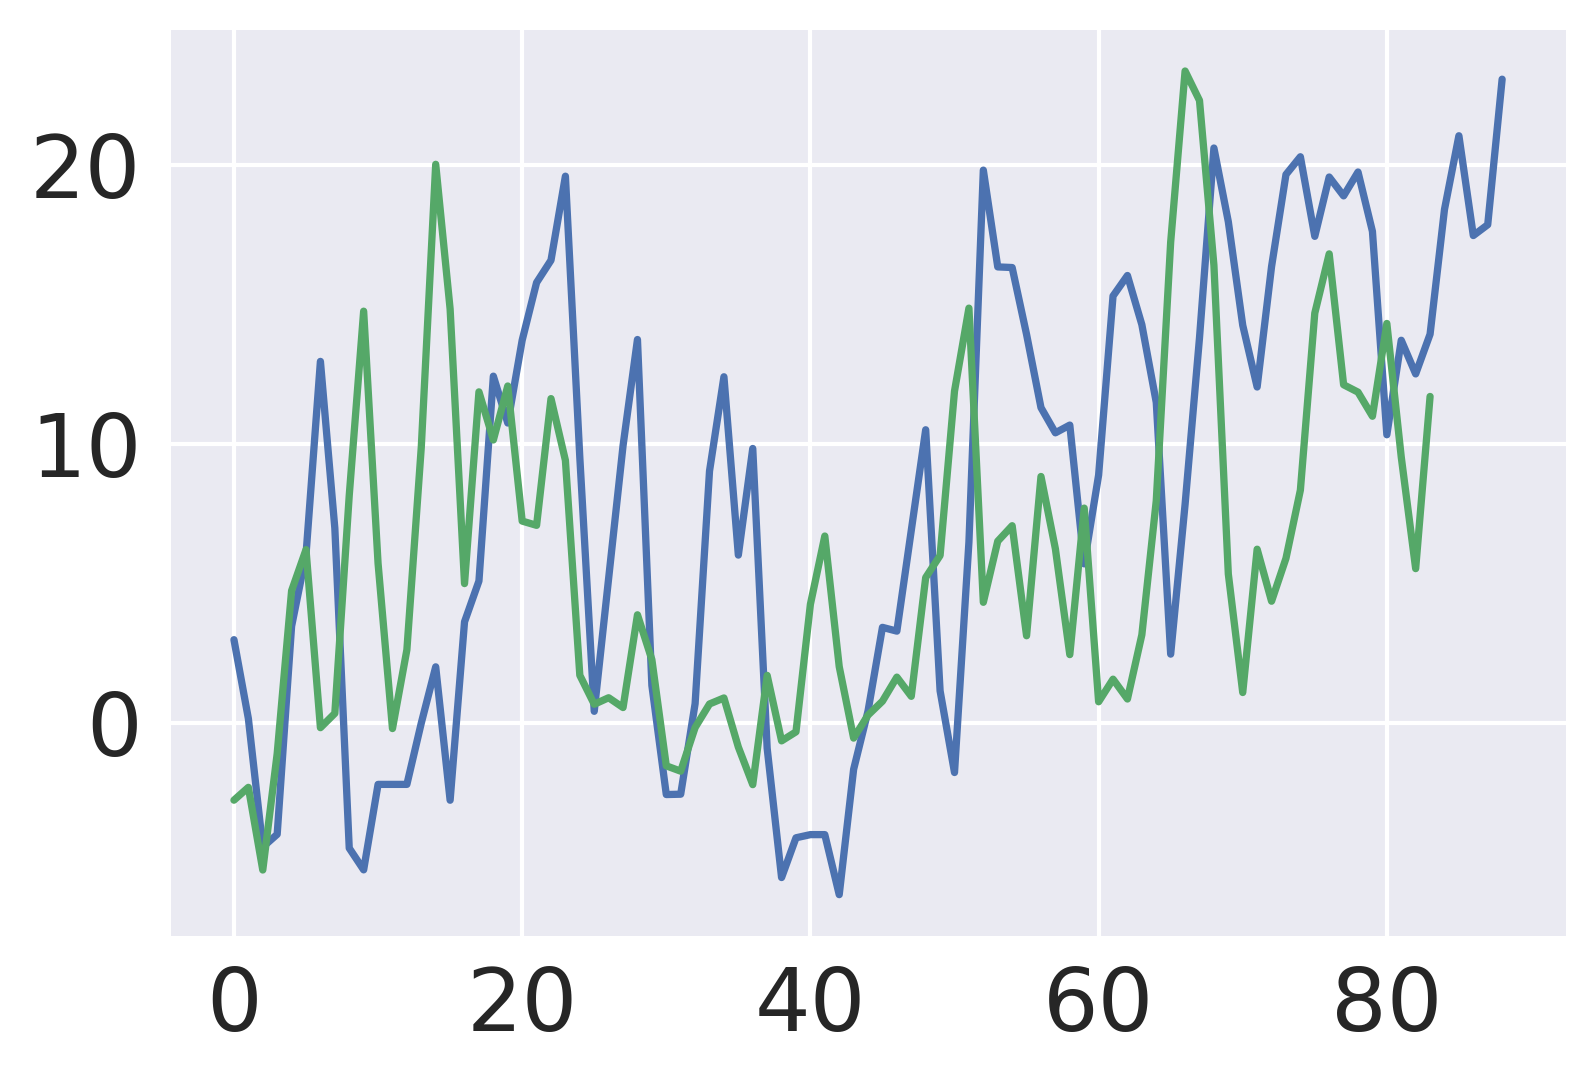

In [377]:
plt.plot(base_oat_daily_all['temp'].as_matrix())
plt.plot(rl_oat_daily_all['temp'].as_matrix())

In [378]:
base_2017_oat_daily_all

,temp
time_utc,
2017-01-01 00:00:00-05:00,3.894761
2017-01-02 00:00:00-05:00,6.544303
2017-01-03 00:00:00-05:00,8.040239
2017-01-04 00:00:00-05:00,1.639349
2017-01-05 00:00:00-05:00,-5.432656
2017-01-06 00:00:00-05:00,-9.556977
2017-01-07 00:00:00-05:00,-10.613607
2017-01-08 00:00:00-05:00,-10.745095
2017-01-09 00:00:00-05:00,-6.870688


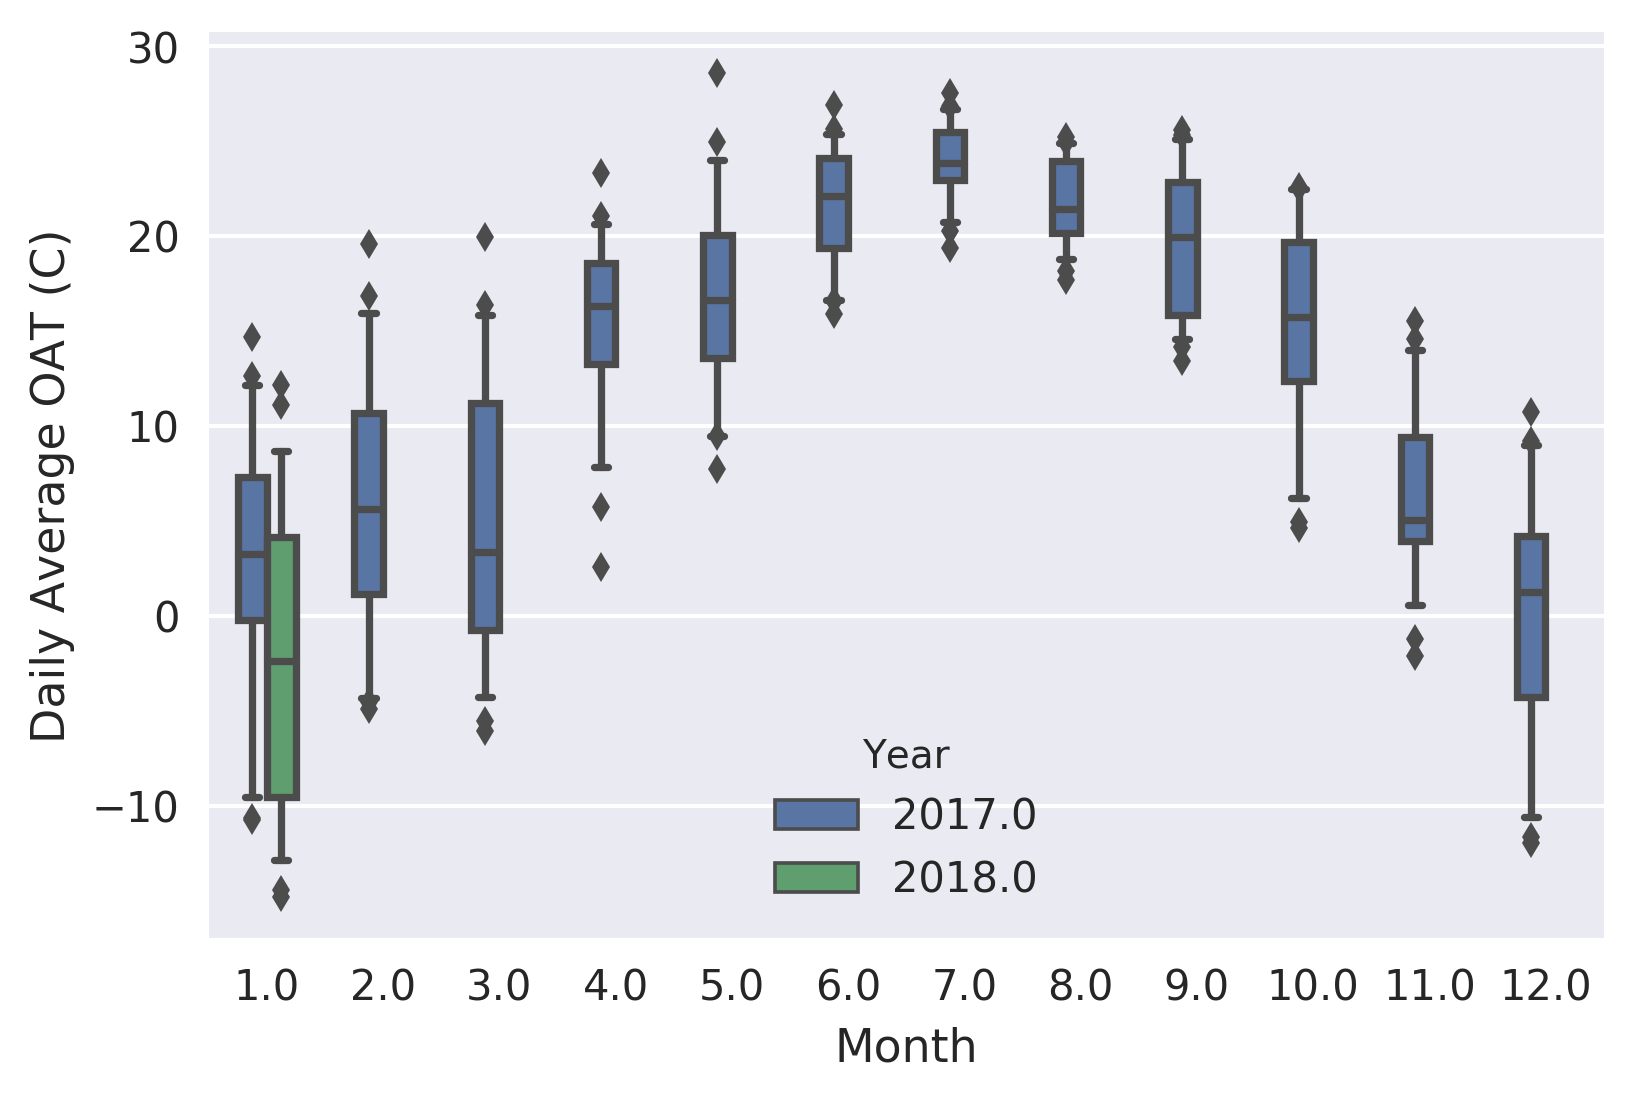

In [458]:
# base and rl oat
base_oat_daily_all_mat = [base_oat_daily_all['temp'].as_matrix(), base_oat_daily_all.index.month.values, 
                          base_oat_daily_all.index.year.values, base_oat_daily_all.index.weekday.values]
rl_oat_daily_all_mat = [rl_oat_daily_all['temp'].as_matrix(), rl_oat_daily_all.index.month.values, 
                        rl_oat_daily_all.index.year.values, rl_oat_daily_all.index.weekday.values]
cmbd_oat_daily_all_mat = [np.concatenate((base_oat_daily_all_mat[0], rl_oat_daily_all_mat[0])), 
                          np.concatenate((base_oat_daily_all_mat[1], rl_oat_daily_all_mat[1])),
                         np.concatenate((base_oat_daily_all_mat[2], rl_oat_daily_all_mat[2])),
                         np.concatenate((base_oat_daily_all_mat[3], rl_oat_daily_all_mat[3]))]
base_2017_oat_daily_all_mat = [base_2017_oat_daily_all['temp'].as_matrix(), base_2017_oat_daily_all.index.month.values, 
                          base_2017_oat_daily_all.index.year.values, base_2017_oat_daily_all.index.weekday.values]

cmbd_oat_daily_all_df = pd.DataFrame(np.array(cmbd_oat_daily_all_mat).T, columns = ['Daily Average OAT (C)', 'Month', 'Year', 'Weekday']);
cmbd_oat_daily_all_df.Month = cmbd_oat_daily_all_df.Month.astype(int)
cmbd_oat_daily_all_df.Year = cmbd_oat_daily_all_df.Year.astype(int)
cmbd_oat_daily_all_df.Weekday = cmbd_oat_daily_all_df.Weekday.astype(int)

cmbd_oat_daily_all_df.loc[cmbd_oat_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_oat_daily_all_df.loc[cmbd_oat_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

base_2017_oat_daily_all_df = pd.DataFrame(np.array(base_2017_oat_daily_all_mat).T, columns = ['Daily Average OAT (C)', 'Month', 'Year', 'Weekday']);

sns.set(font_scale=1)
#sns.violinplot(x = 'Month', y = 'Daily Average OAT (C)', hue = 'Year', data = cmbd_oat_daily_all_df
#            , palette = 'deep', width = 0.5, whis = [5, 95])

sns.boxplot(x = 'Month', y = 'Daily Average OAT (C)', hue = 'Year', data = base_2017_oat_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])


In [459]:

base_2017_oat_sts = base_2017_oat_daily_all_df.groupby(
    [base_2017_oat_daily_all_df.Year, base_2017_oat_daily_all_df.Month]).agg(['mean', 'std'])

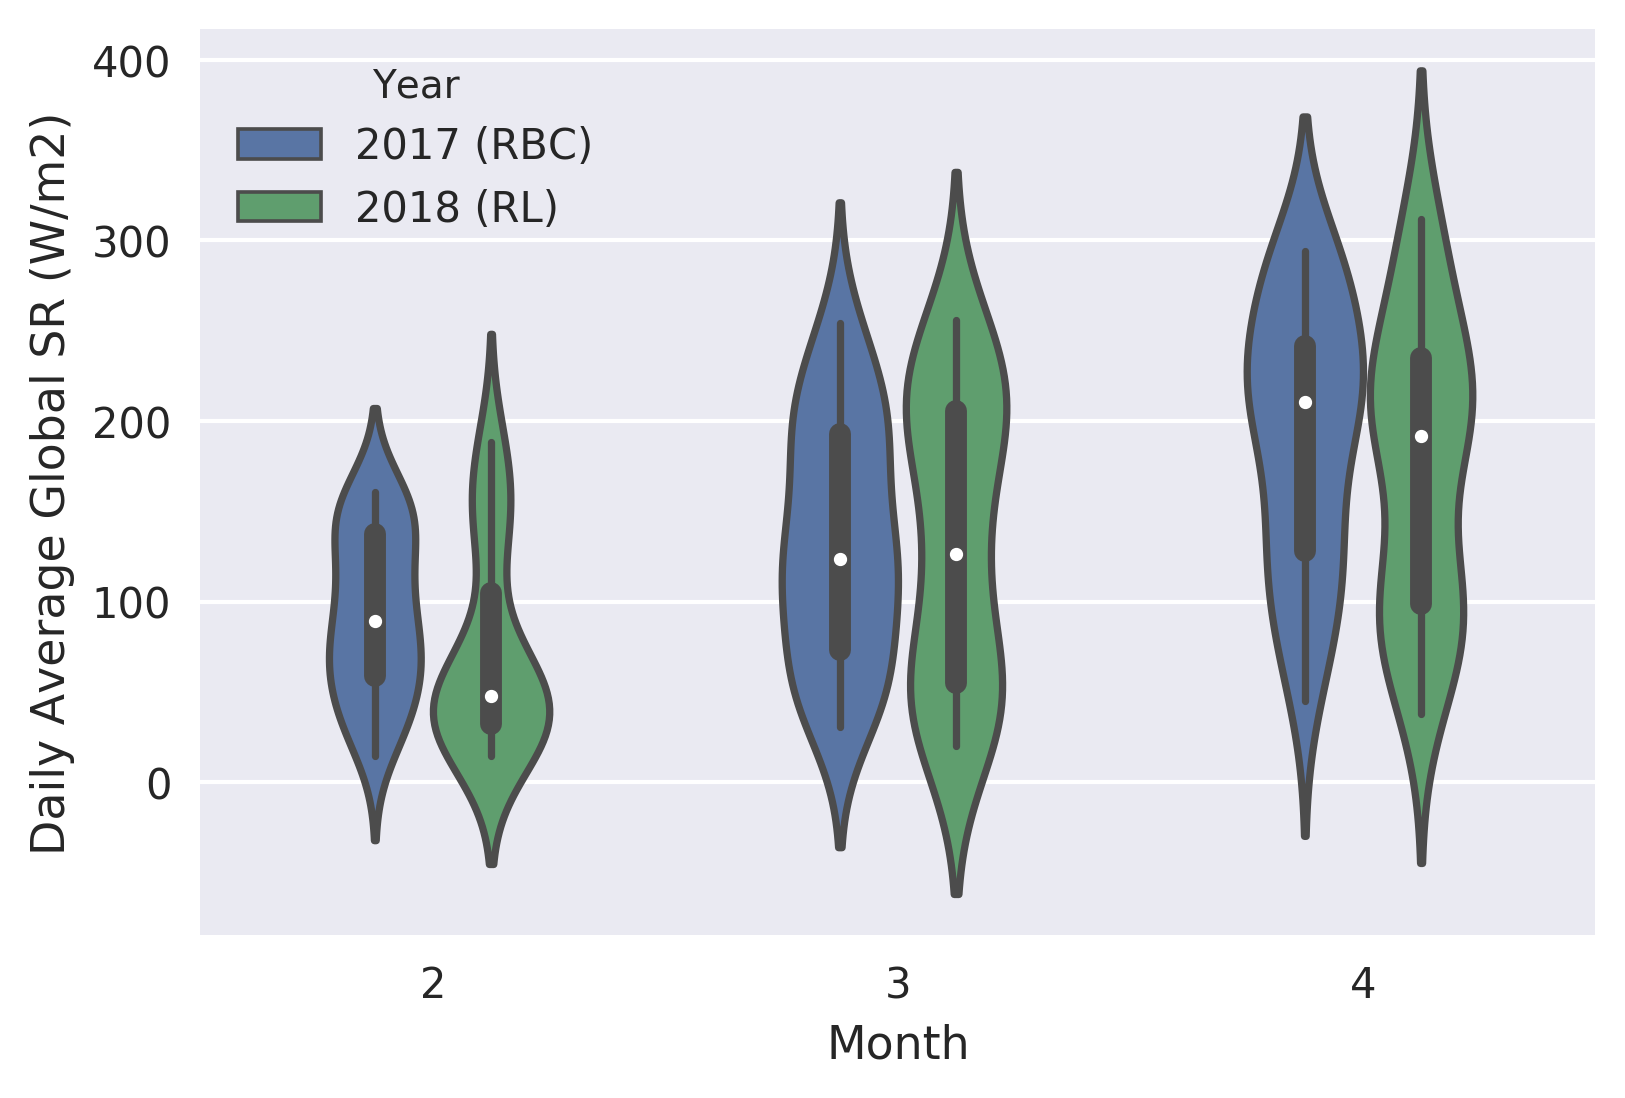

In [460]:
# base and rl solarGlob
base_solarGlob_daily_all_mat = [base_solarGlob_daily_all['solarRad'].as_matrix(), base_solarGlob_daily_all.index.month.values, 
                                base_solarGlob_daily_all.index.year.values, base_solarGlob_daily_all.index.weekday.values]
rl_solarGlob_daily_all_mat = [rl_solarGlob_daily_all['solarRad'].as_matrix(), rl_solarGlob_daily_all.index.month.values, 
                              rl_solarGlob_daily_all.index.year.values, rl_solarGlob_daily_all.index.weekday.values]
cmbd_solarGlob_daily_all_mat = [np.concatenate((base_solarGlob_daily_all_mat[0], rl_solarGlob_daily_all_mat[0])), 
                                np.concatenate((base_solarGlob_daily_all_mat[1], rl_solarGlob_daily_all_mat[1])),
                                np.concatenate((base_solarGlob_daily_all_mat[2], rl_solarGlob_daily_all_mat[2])),
                                np.concatenate((base_solarGlob_daily_all_mat[3], rl_solarGlob_daily_all_mat[3]))]

cmbd_solarGlob_daily_all_df = pd.DataFrame(np.array(cmbd_solarGlob_daily_all_mat).T, columns = ['Daily Average Global SR (W/m2)', 'Month', 'Year', 'Weekday']);
cmbd_solarGlob_daily_all_df.Month = cmbd_solarGlob_daily_all_df.Month.astype(int)
cmbd_solarGlob_daily_all_df.Year = cmbd_solarGlob_daily_all_df.Year.astype(int)

cmbd_solarGlob_daily_all_df.loc[cmbd_solarGlob_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_solarGlob_daily_all_df.loc[cmbd_solarGlob_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.violinplot(x = 'Month', y = 'Daily Average Global SR (W/m2)', hue = 'Year', data = cmbd_solarGlob_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

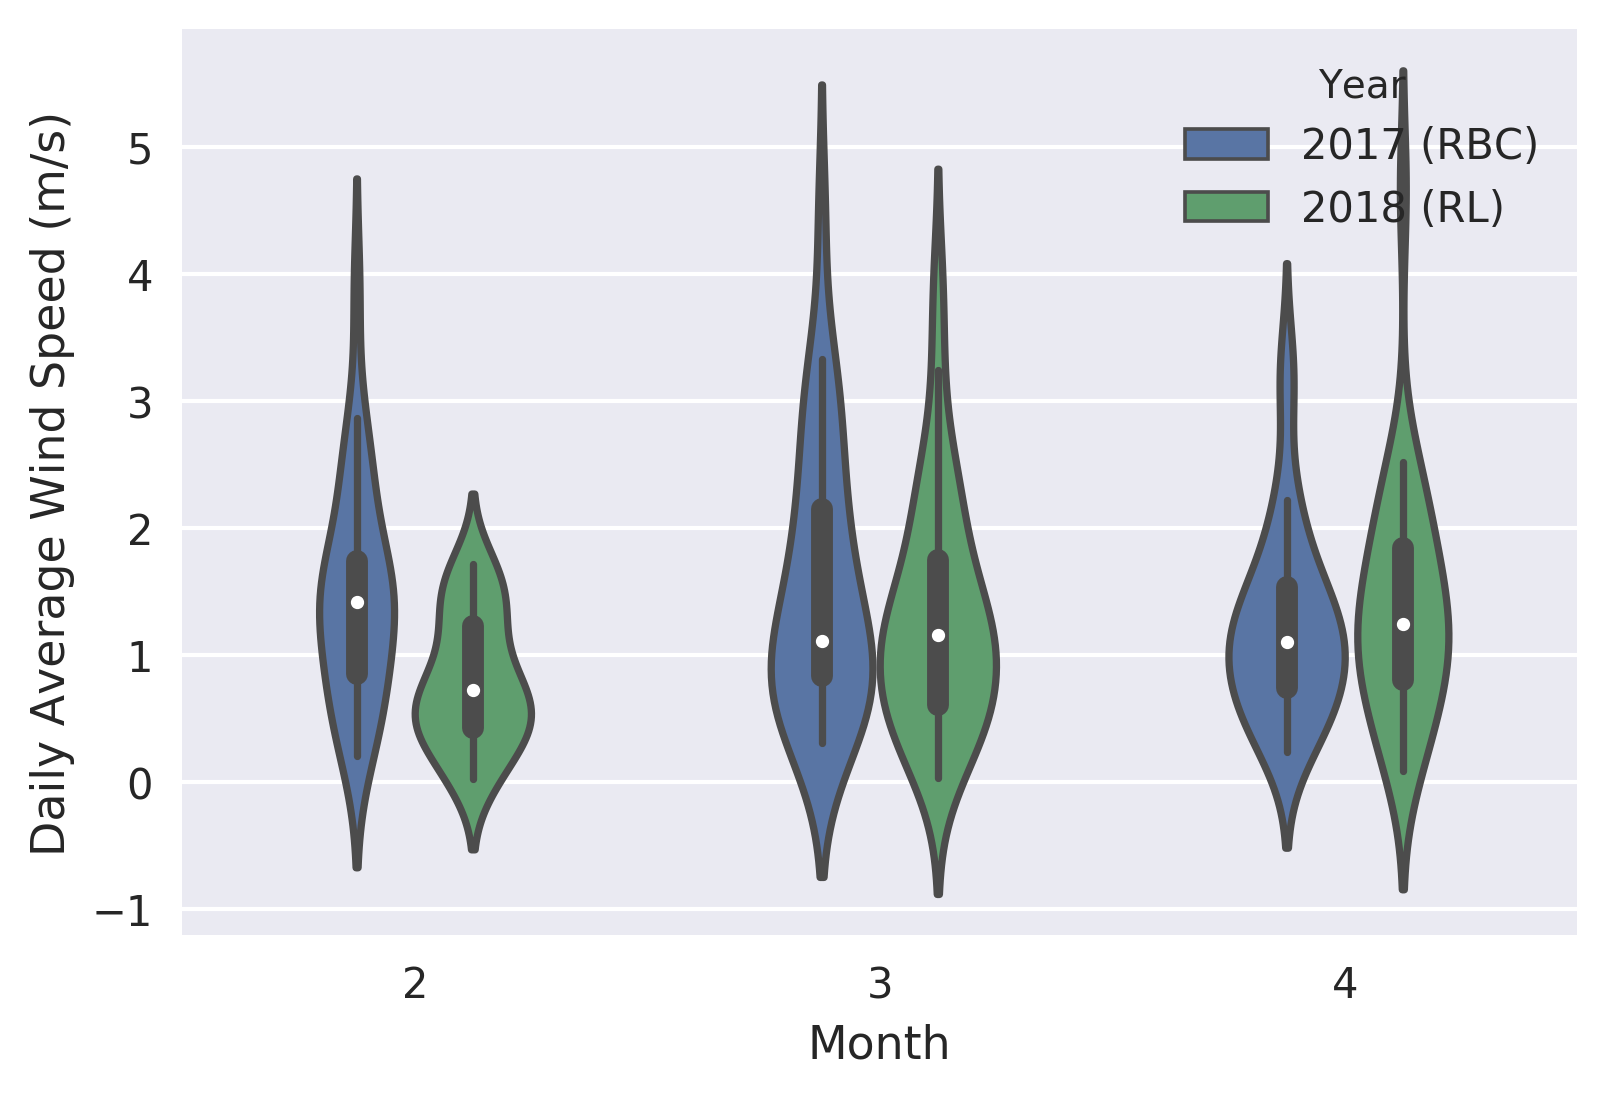

In [461]:
# base and rl ws
base_ws_daily_all_mat = [base_ws_daily_all['ws'].as_matrix(), base_ws_daily_all.index.month.values, 
                             base_ws_daily_all.index.year.values, base_ws_daily_all.index.weekday.values]
rl_ws_daily_all_mat = [rl_ws_daily_all['ws'].as_matrix(), rl_ws_daily_all.index.month.values, 
                           rl_ws_daily_all.index.year.values, rl_ws_daily_all.index.weekday.values]
cmbd_ws_daily_all_mat = [np.concatenate((base_ws_daily_all_mat[0], rl_ws_daily_all_mat[0])), 
                             np.concatenate((base_ws_daily_all_mat[1], rl_ws_daily_all_mat[1])),
                             np.concatenate((base_ws_daily_all_mat[2], rl_ws_daily_all_mat[2])),
                             np.concatenate((base_ws_daily_all_mat[3], rl_ws_daily_all_mat[3]))]

cmbd_ws_daily_all_df = pd.DataFrame(np.array(cmbd_ws_daily_all_mat).T, columns = ['Daily Average Wind Speed (m/s)', 
                                                                                          'Month', 'Year', 'Weekday']);
cmbd_ws_daily_all_df.Month = cmbd_ws_daily_all_df.Month.astype(int)
cmbd_ws_daily_all_df.Year = cmbd_ws_daily_all_df.Year.astype(int)

cmbd_ws_daily_all_df.loc[cmbd_ws_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_ws_daily_all_df.loc[cmbd_ws_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.violinplot(x = 'Month', y = 'Daily Average Wind Speed (m/s)', hue = 'Year', data = cmbd_ws_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

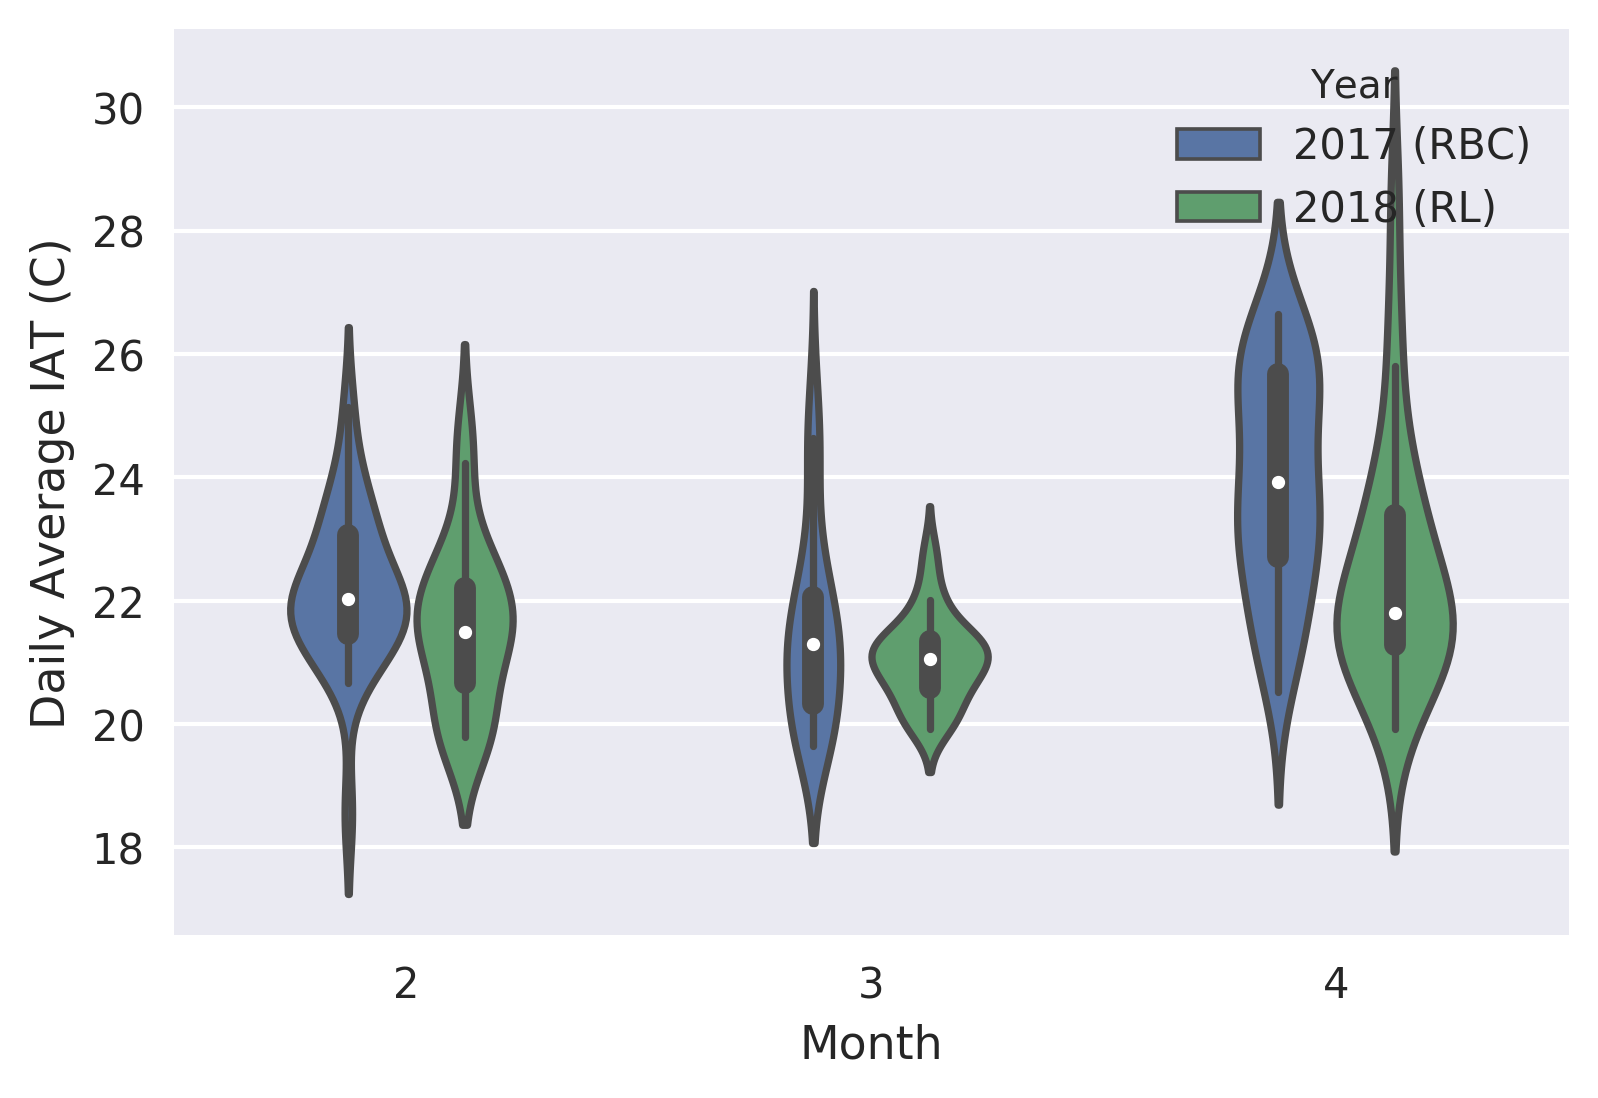

In [462]:
# base and rl iat
base_iat_daily_all_mat = [base_iat_daily_all['temp'].as_matrix(), base_iat_daily_all.index.month.values, 
                             base_iat_daily_all.index.year.values, base_iat_daily_all.index.weekday.values]
rl_iat_daily_all_mat = [rl_iat_daily_all['temp'].as_matrix(), rl_iat_daily_all.index.month.values, 
                           rl_iat_daily_all.index.year.values, rl_iat_daily_all.index.weekday.values]
cmbd_iat_daily_all_mat = [np.concatenate((base_iat_daily_all_mat[0], rl_iat_daily_all_mat[0])), 
                             np.concatenate((base_iat_daily_all_mat[1], rl_iat_daily_all_mat[1])),
                             np.concatenate((base_iat_daily_all_mat[2], rl_iat_daily_all_mat[2])),
                             np.concatenate((base_iat_daily_all_mat[3], rl_iat_daily_all_mat[3]))]

cmbd_iat_daily_all_df = pd.DataFrame(np.array(cmbd_iat_daily_all_mat).T, columns = ['Daily Average IAT (C)', 
                                                                                          'Month', 'Year', 'Weekday']);
cmbd_iat_daily_all_df.Month = cmbd_iat_daily_all_df.Month.astype(int)
cmbd_iat_daily_all_df.Year = cmbd_iat_daily_all_df.Year.astype(int)

cmbd_iat_daily_all_df.loc[cmbd_iat_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_iat_daily_all_df.loc[cmbd_iat_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.violinplot(x = 'Month', y = 'Daily Average IAT (C)', hue = 'Year', data = cmbd_iat_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

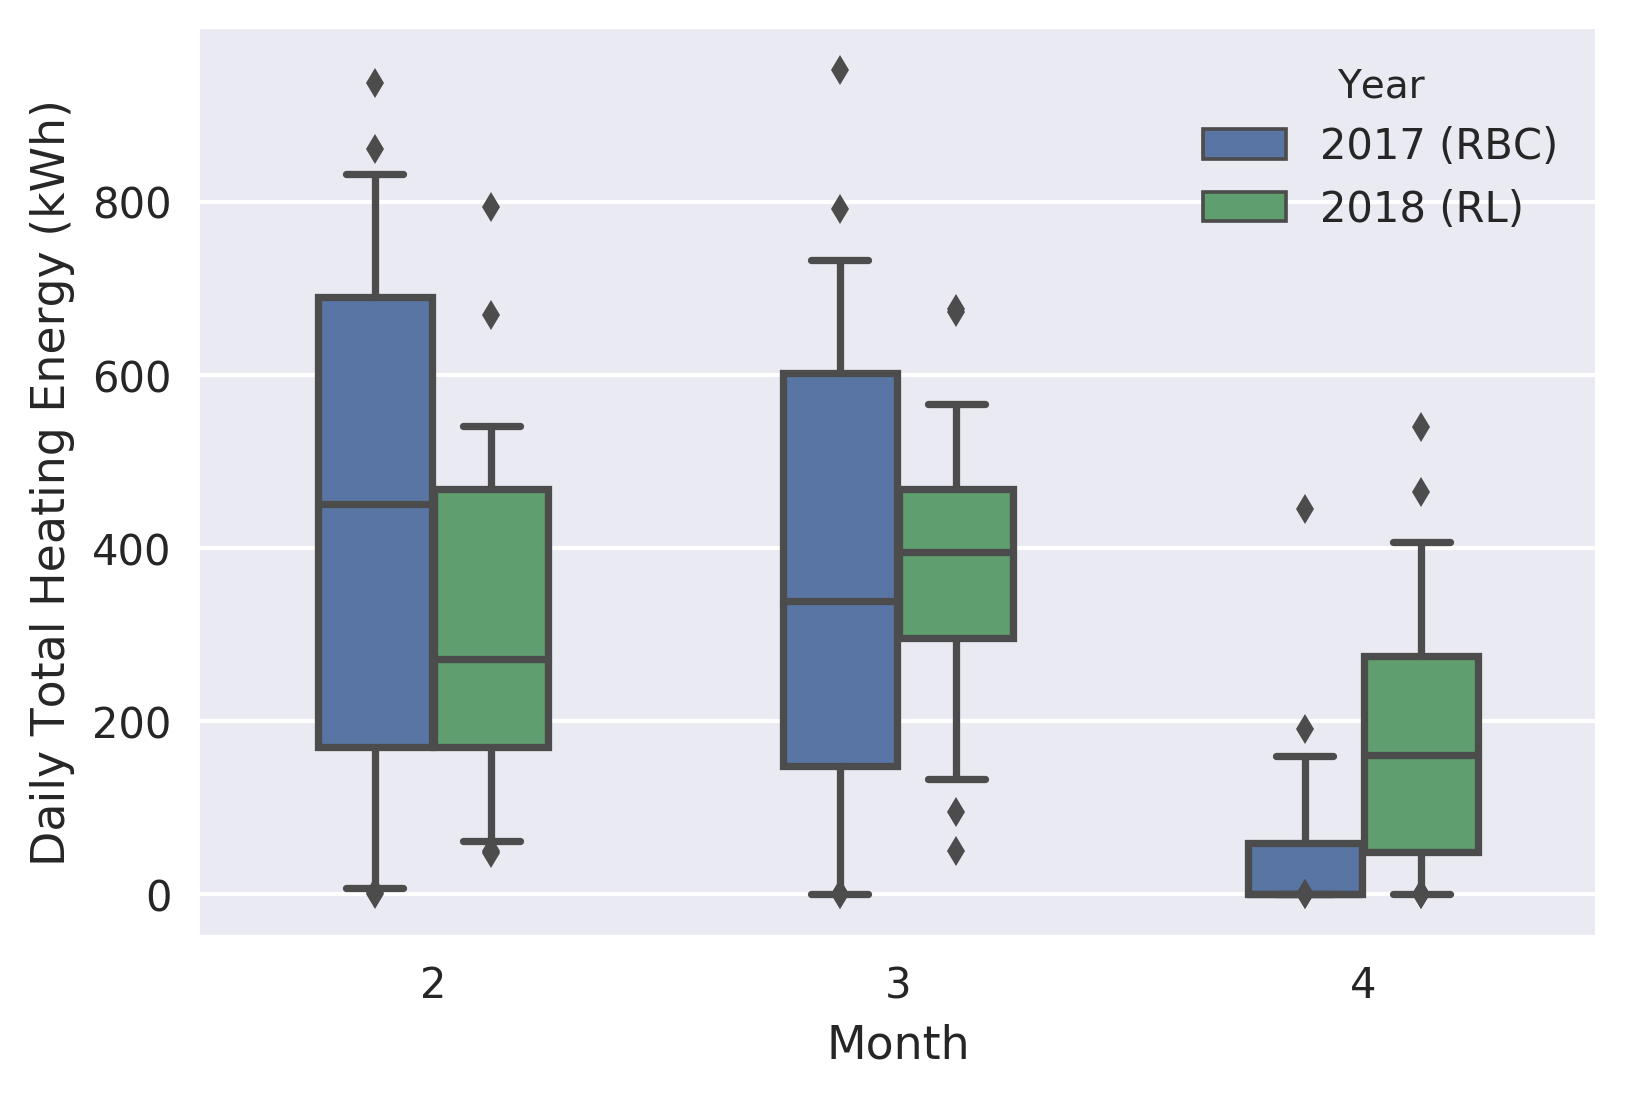

In [473]:
# base and rl energy
base_energy_daily_all_mat = [base_energy_daily_all['energy'].as_matrix(), base_energy_daily_all.index.month.values, 
                             base_energy_daily_all.index.year.values, base_energy_daily_all.index.weekday.values]
rl_energy_daily_all_mat = [rl_energy_daily_all['energy'].as_matrix(), rl_energy_daily_all.index.month.values, 
                           rl_energy_daily_all.index.year.values, rl_energy_daily_all.index.weekday.values]
cmbd_energy_daily_all_mat = [np.concatenate((base_energy_daily_all_mat[0], rl_energy_daily_all_mat[0])), 
                             np.concatenate((base_energy_daily_all_mat[1], rl_energy_daily_all_mat[1])),
                             np.concatenate((base_energy_daily_all_mat[2], rl_energy_daily_all_mat[2])),
                             np.concatenate((base_energy_daily_all_mat[3], rl_energy_daily_all_mat[3]))]

sns.set(font_scale=1.0)
cmbd_energy_daily_all_df = pd.DataFrame(np.array(cmbd_energy_daily_all_mat).T, columns = ['Daily Total Heating Energy (kWh)', 
                                                                                          'Month', 'Year', 'Weekday']);
cmbd_energy_daily_all_df.Month = cmbd_energy_daily_all_df.Month.astype(int)
cmbd_energy_daily_all_df.Year = cmbd_energy_daily_all_df.Year.astype(int)

cmbd_energy_daily_all_df.loc[cmbd_energy_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_energy_daily_all_df.loc[cmbd_energy_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.boxplot(x = 'Month', y = 'Daily Total Heating Energy (kWh)', hue = 'Year', data = cmbd_energy_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

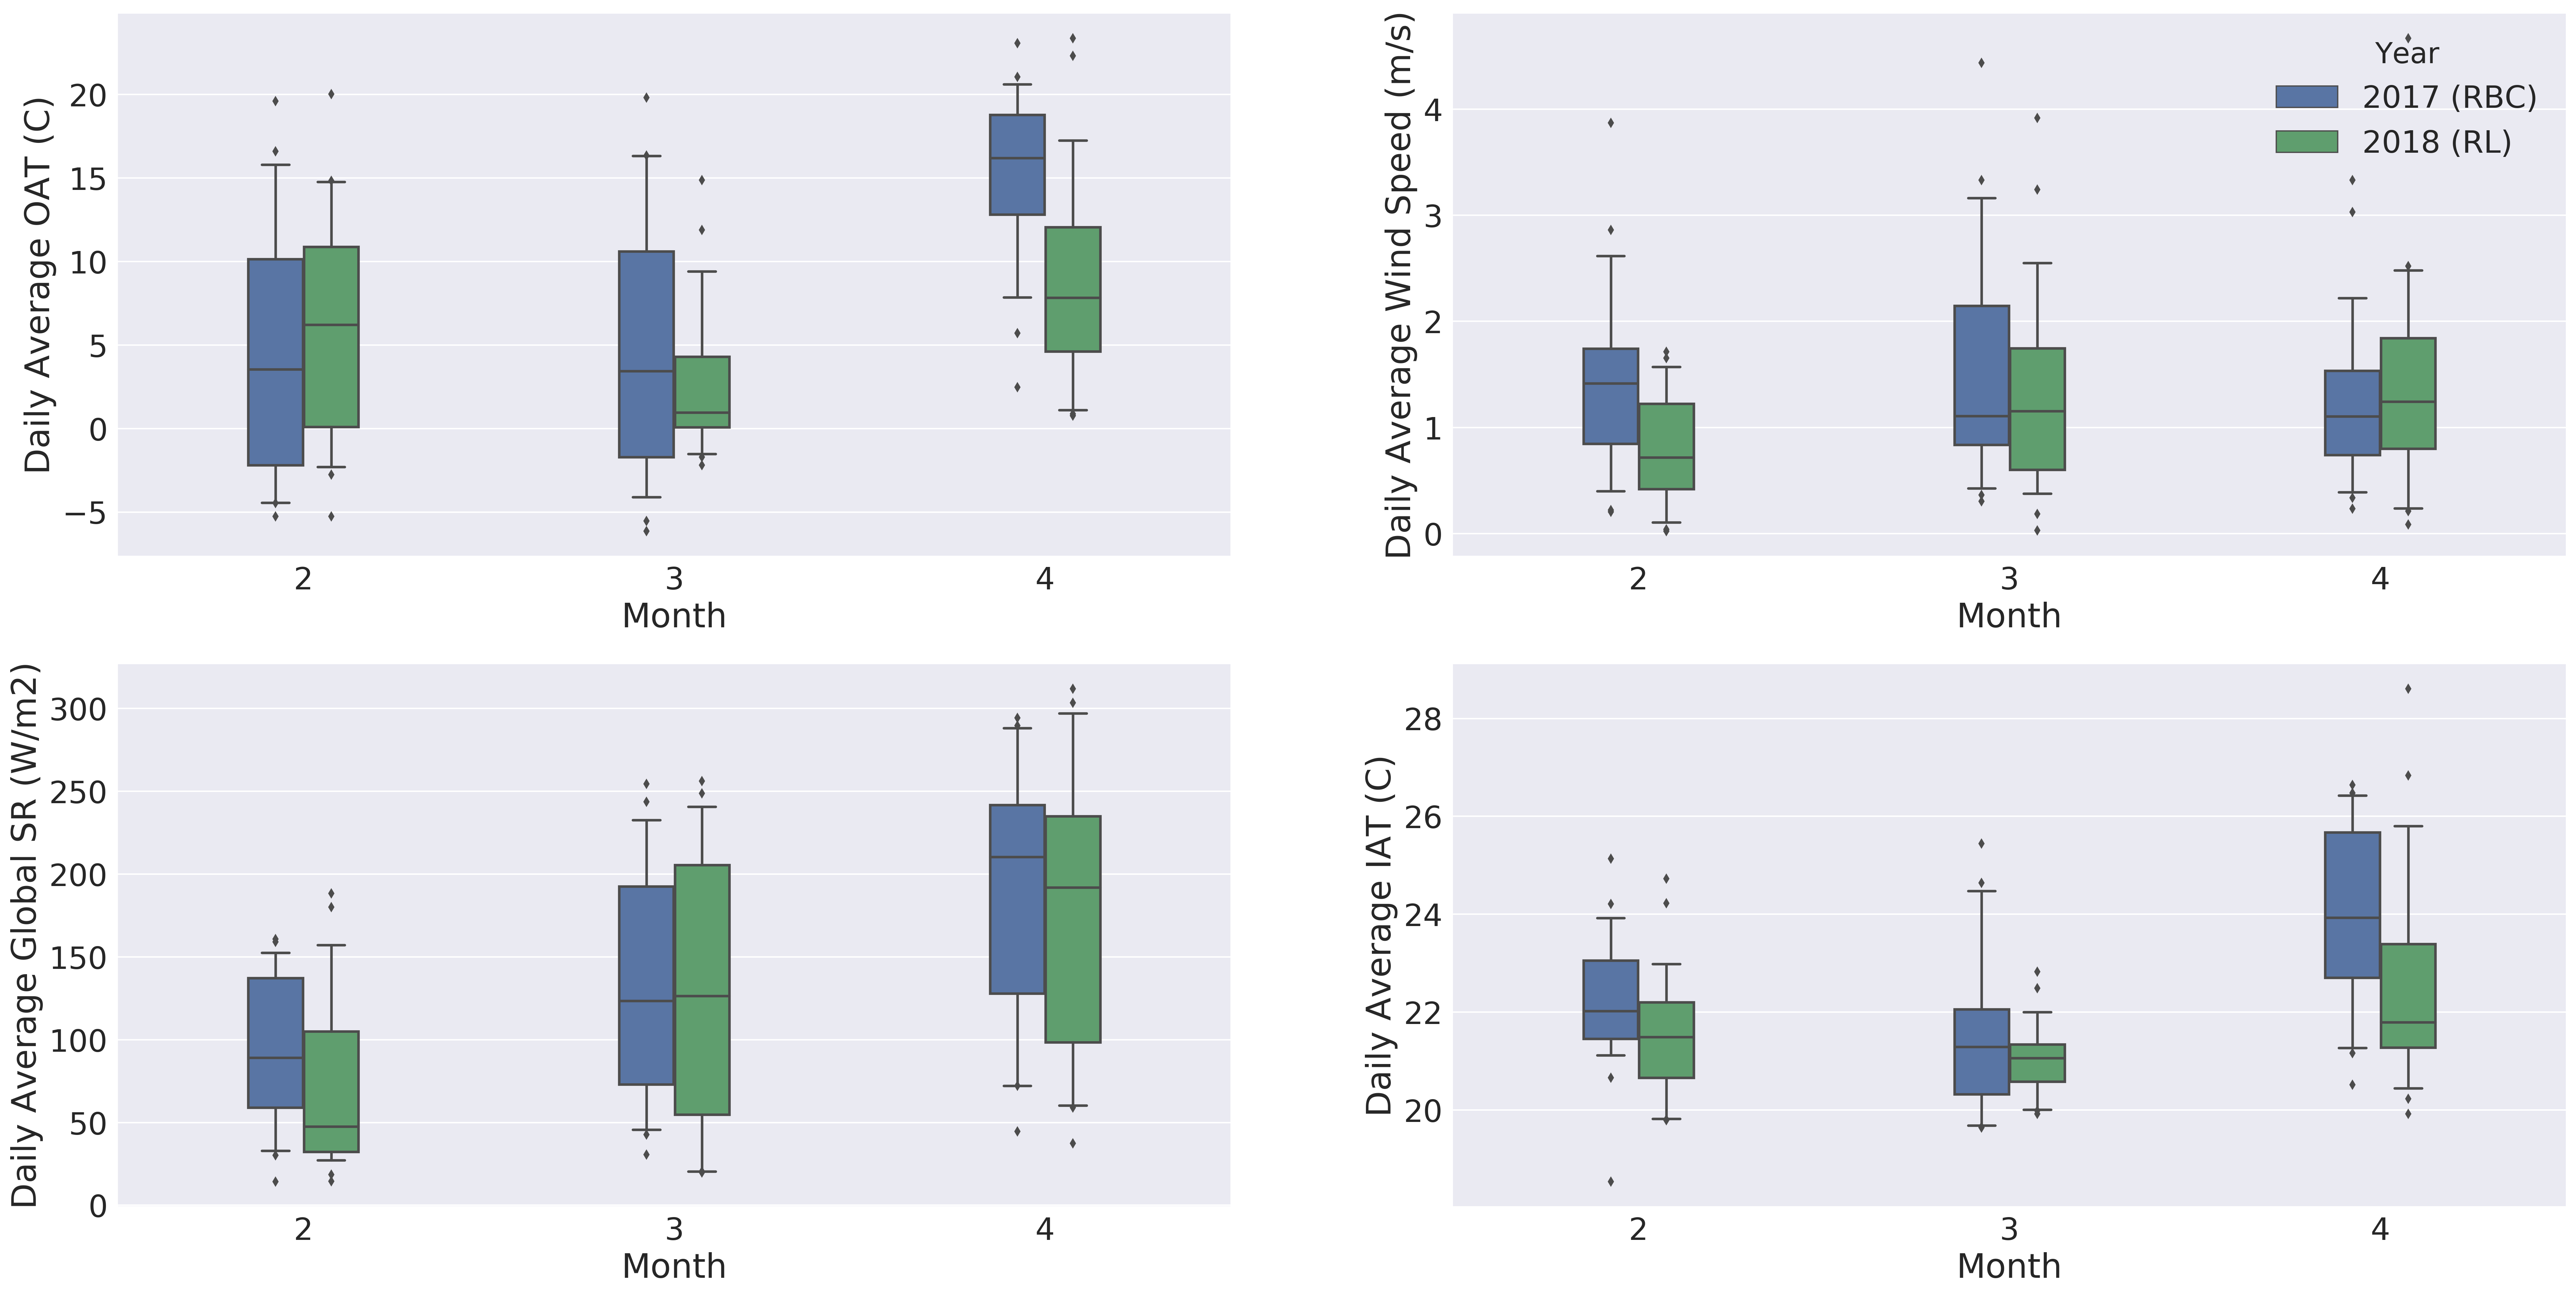

In [471]:
plt.figure(figsize=(30,15))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (0, 1))
ax4 = plt.subplot2grid((2, 2), (1, 1))
#ax3.set_ylim(0,500)
sns.set(font_scale=2.1)
sns.boxplot(x = 'Month', y = 'Daily Average OAT (C)', hue = 'Year', data = cmbd_oat_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax1)
sns.boxplot(x = 'Month', y = 'Daily Average Global SR (W/m2)', hue = 'Year', data = cmbd_solarGlob_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax2)
sns.boxplot(x = 'Month', y = 'Daily Average Wind Speed (m/s)', hue = 'Year', data = cmbd_ws_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax3)
sns.boxplot(x = 'Month', y = 'Daily Average IAT (C)', hue = 'Year', data = cmbd_iat_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax4)


ax1.legend_.remove()
ax2.legend_.remove()
ax4.legend_.remove()

In [287]:
cmbd_oat_daily_all_df

,Daily Average OAT (C),Month,Year
0,2.996546,2,2017
1,0.170063,2,2017
2,-4.435900,2,2017
3,-3.977878,2,2017
4,3.478026,2,2017
5,6.043428,2,2017
6,12.969639,2,2017
7,6.993092,2,2017
8,-4.473375,2,2017
9,-5.251919,2,2017


In [304]:
# Statistics on base
base_oat_daily_feb = cmbd_oat_daily_all_df['Daily Average OAT (C)'][(cmbd_oat_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_oat_daily_all_df["Month"] == 2)]
base_oat_daily_mar = cmbd_oat_daily_all_df['Daily Average OAT (C)'][(cmbd_oat_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_oat_daily_all_df["Month"] == 3)]
base_oat_daily_apr = cmbd_oat_daily_all_df['Daily Average OAT (C)'][(cmbd_oat_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_oat_daily_all_df["Month"] == 4)]
base_oat_daily_feb_mean = np.mean(base_oat_daily_feb)
base_oat_daily_mar_mean = np.mean(base_oat_daily_mar)
base_oat_daily_apr_mean = np.mean(base_oat_daily_apr)
base_oat_daily_feb_std = np.std(base_oat_daily_feb)
base_oat_daily_mar_std = np.std(base_oat_daily_mar)
base_oat_daily_apr_std = np.std(base_oat_daily_apr)

base_sr_daily_feb = cmbd_solarGlob_daily_all_df['Daily Average Global SR (W/m2)'][(cmbd_solarGlob_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_solarGlob_daily_all_df["Month"] == 2)]
base_sr_daily_mar = cmbd_solarGlob_daily_all_df['Daily Average Global SR (W/m2)'][(cmbd_solarGlob_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_solarGlob_daily_all_df["Month"] == 3)]
base_sr_daily_apr = cmbd_solarGlob_daily_all_df['Daily Average Global SR (W/m2)'][(cmbd_solarGlob_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_solarGlob_daily_all_df["Month"] == 4)]
base_sr_daily_feb_mean = np.mean(base_sr_daily_feb)
base_sr_daily_mar_mean = np.mean(base_sr_daily_mar)
base_sr_daily_apr_mean = np.mean(base_sr_daily_apr)
base_sr_daily_feb_std = np.std(base_sr_daily_feb)
base_sr_daily_mar_std = np.std(base_sr_daily_mar)
base_sr_daily_apr_std = np.std(base_sr_daily_apr)

base_ht_daily_feb = cmbd_energy_daily_all_df['Daily Total Heating Energy (kWh)'][(cmbd_energy_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_energy_daily_all_df["Month"] == 2)]
base_ht_daily_mar = cmbd_energy_daily_all_df['Daily Total Heating Energy (kWh)'][(cmbd_energy_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_energy_daily_all_df["Month"] == 3)]
base_ht_daily_apr = cmbd_energy_daily_all_df['Daily Total Heating Energy (kWh)'][(cmbd_energy_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_energy_daily_all_df["Month"] == 4)]
base_ht_daily_feb_mean = np.mean(base_ht_daily_feb)
base_ht_daily_mar_mean = np.mean(base_ht_daily_mar)
base_ht_daily_apr_mean = np.mean(base_ht_daily_apr)
base_ht_daily_feb_std = np.std(base_ht_daily_feb)
base_ht_daily_mar_std = np.std(base_ht_daily_mar)
base_ht_daily_apr_std = np.std(base_ht_daily_apr)


In [391]:
# Statistics
cmbd_oat_sts = cmbd_oat_daily_all_df.groupby(
    [cmbd_oat_daily_all_df.Year, cmbd_oat_daily_all_df.Month]).agg(['mean', 'std'])

In [392]:
cmbd_oat_sts

Daily Average OAT (C)           Month       Year        Weekday  \
                            mean       std  mean  std  mean  std      mean   
Year Month                                                                   
2017 2                  4.642089  7.213182     2  0.0  2017  0.0  3.000000   
     3                  4.874955  7.432666     3  0.0  2017  0.0  3.000000   
     4                 15.295632  4.827555     4  0.0  2017  0.0  3.166667   
2018 2                  6.120717  6.534678     2  0.0  2018  0.0  2.869565   
     3                  2.596094  4.000914     3  0.0  2018  0.0  3.096774   
     4                  8.940117  6.156556     4  0.0  2018  0.0  3.000000   

                      
                 std  
Year Month            
2017 2      2.036700  
     3      1.949359  
     4      2.069205  
2018 2      2.006905  
     3      1.972390  
     4      2.117253

In [176]:
# Plot oat base cmp


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [158]:
rl_oat_daily_all['temp'].as_matrix()

array([-2.75477958, -2.29541752, -5.25706601, -1.08516084,  4.75026856,
        6.22351556, -0.15678205,  0.35614632,  8.16599281, 14.76920087,
        5.73210736, -0.18830074,  2.63444213,  9.90164298, 20.03235998,
       14.84653275,  5.00639662, 11.87727058, 10.15388702, 12.08756523,
        7.2471258 ,  7.09423877, 11.63530293,  9.42122978,  1.72084028,
        0.68215738,  0.91649655,  0.56411101,  3.88801942,  2.28161332,
       -1.52401205, -1.71554131, -0.15254541,  0.69285788,  0.90810666,
       -0.8514945 , -2.19820344,  1.7166539 , -0.629604  , -0.3057004 ,
        4.26390265,  6.71073687,  2.03123383, -0.53032535,  0.29426786,
        0.79199523,  1.65506491,  0.96654474,  5.22209046,  6.01496961,
       11.90378131, 14.87781978,  4.33616888,  6.52569288,  7.08075447,
        3.1370854 ,  8.84497616,  6.25423202,  2.46113507,  7.71175686,
        0.77096076,  1.58178623,  0.87083664,  3.17211494,  7.9774094 ,
       17.2451739 , 23.37503626, 22.31951589, 16.41817069,  5.35

In [150]:
base_energy_monthly_daily_mean

,energy
time_utc,
2017-02-28 00:00:00-05:00,436.757879
2017-03-31 00:00:00-04:00,354.684667
2017-04-30 00:00:00-04:00,46.909187
2017-05-31 00:00:00-04:00,0.000000


In [52]:
rl_energy_monthly_daily_mean

,energy
time_utc,
2018-02-28 00:00:00-05:00,3.134846e+02
2018-03-31 00:00:00-04:00,3.765970e+02
2018-04-30 00:00:00-04:00,1.765644e+02
2018-05-31 00:00:00-04:00,6.124781e-08


In [55]:
base_oat_monthly_mean

,temp
time_utc,
2017-01-31 00:00:00-05:00,2.761001
2017-02-28 00:00:00-05:00,4.642089
2017-03-31 00:00:00-04:00,4.887039
2017-04-30 00:00:00-04:00,15.295632
2017-05-31 00:00:00-04:00,24.700000


In [56]:
rl_oat_monthly_mean

,energy
time_utc,
2018-02-28 00:00:00-05:00,6.122057
2018-03-31 00:00:00-04:00,2.598656
2018-04-30 00:00:00-04:00,8.940117
2018-05-31 00:00:00-04:00,13.046467


In [17]:
print (base_energy_monthly)
print (rl_energy_monthly)

                                    kwh
2016-11-30 00:00:00-05:00   9064.788974
2016-12-31 00:00:00-05:00  21787.098342
2017-01-31 00:00:00-05:00  20181.907227
2017-02-28 00:00:00-05:00  12323.371625
2017-03-31 00:00:00-04:00  11006.409210
                                   kwh
2018-02-28 00:00:00-05:00  7043.746059


In [18]:
base_oat_daily_interval

,c
2017-02-06 00:00:00-05:00,6.087000
2017-02-07 00:00:00-05:00,13.040820
2017-02-08 00:00:00-05:00,6.936330
2017-02-09 00:00:00-05:00,-4.516864
2017-02-10 00:00:00-05:00,-4.903399
2017-02-11 00:00:00-05:00,8.612172
2017-02-12 00:00:00-05:00,8.561714
2017-02-13 00:00:00-05:00,1.377446
2017-02-14 00:00:00-05:00,4.099263
2017-02-15 00:00:00-05:00,1.878854


In [19]:
rl_energy_daily

,kwh
2018-02-06 00:00:00-05:00,442.763422
2018-02-07 00:00:00-05:00,662.798949
2018-02-08 00:00:00-05:00,770.971059
2018-02-09 00:00:00-05:00,573.712752
2018-02-12 00:00:00-05:00,492.158863
2018-02-13 00:00:00-05:00,486.209606
2018-02-14 00:00:00-05:00,260.749702
2018-02-15 00:00:00-05:00,51.214812
2018-02-16 00:00:00-05:00,366.752535
2018-02-19 00:00:00-05:00,269.886417


In [20]:
rl_oat_daily

,c
2018-02-06 00:00:00-05:00,-2.756504
2018-02-07 00:00:00-05:00,-2.302190
2018-02-08 00:00:00-05:00,-5.256351
2018-02-09 00:00:00-05:00,-1.071231
2018-02-12 00:00:00-05:00,-0.162439
2018-02-13 00:00:00-05:00,0.367533
2018-02-14 00:00:00-05:00,8.173204
2018-02-15 00:00:00-05:00,14.781290
2018-02-16 00:00:00-05:00,5.706644
2018-02-19 00:00:00-05:00,9.921816


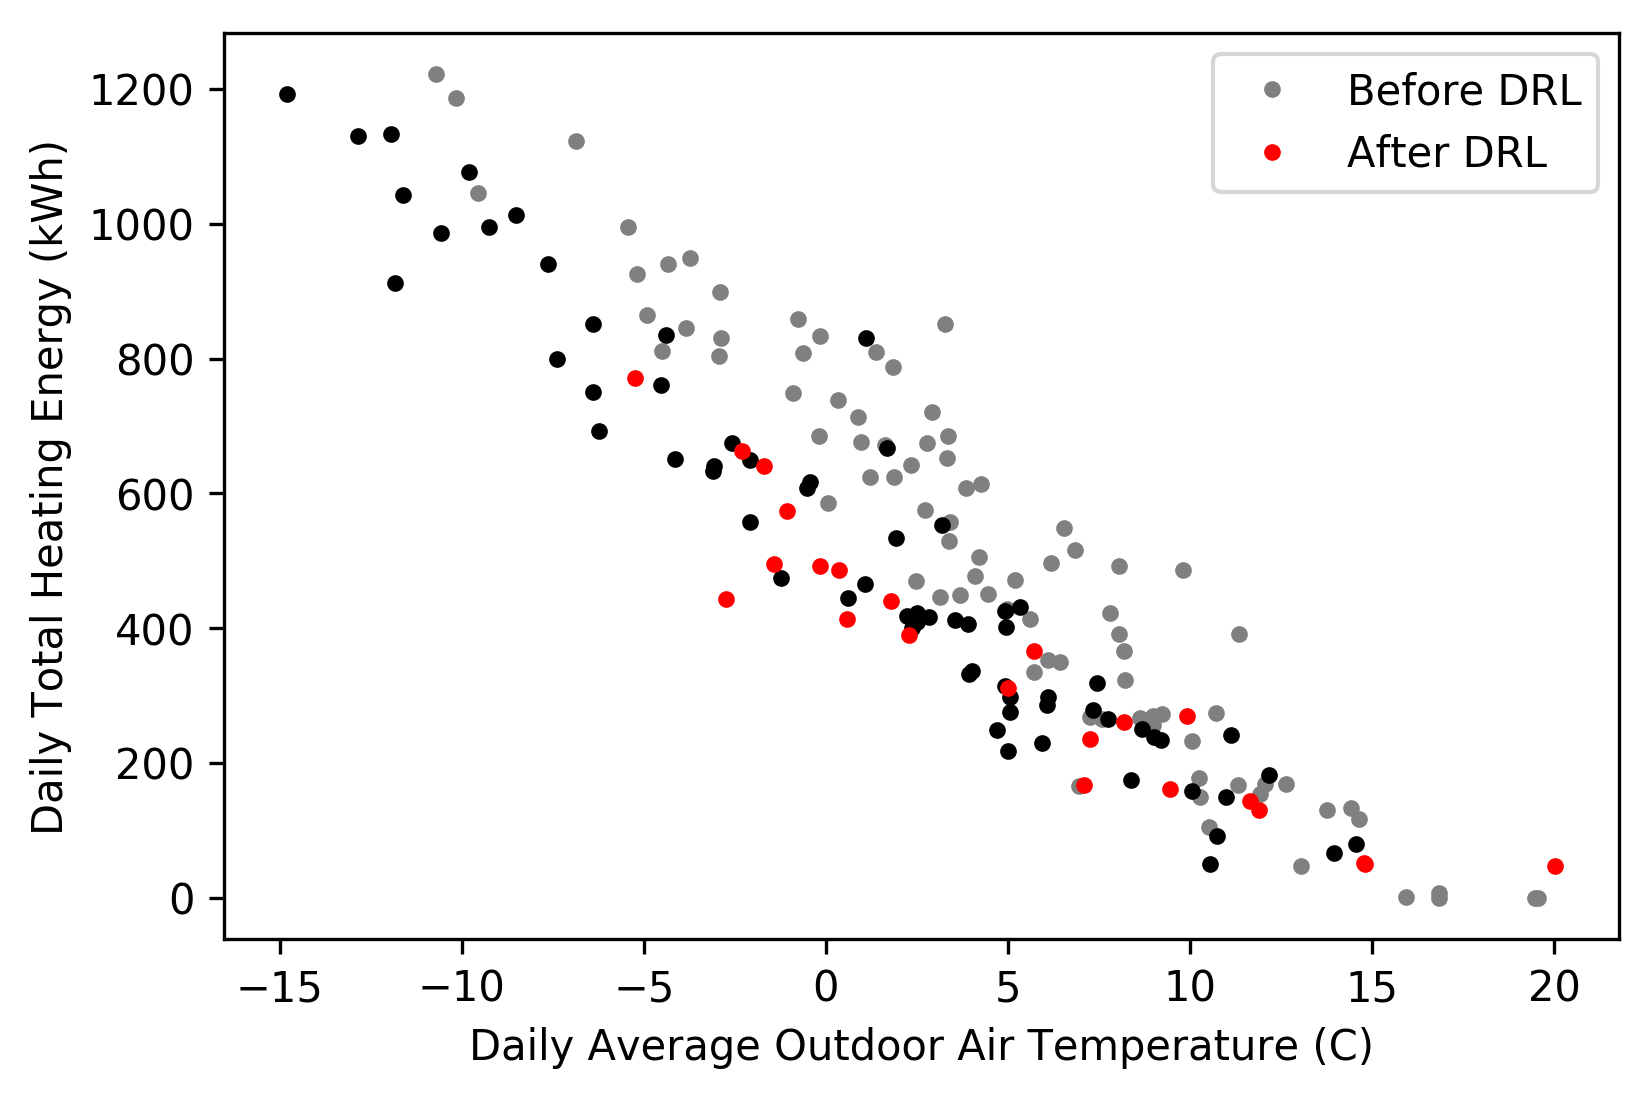

In [21]:
plt.plot(base_oat_daily.as_matrix(columns = ['c']), base_energy_daily.as_matrix(columns = ['kwh']), '.', color = 'gray', label='Before DRL')
plt.plot(base_oat_daily_17.as_matrix(columns = ['c']), base_energy_daily_17.as_matrix(columns = ['kwh']), '.', color = 'black')
plt.plot(rl_oat_daily.as_matrix(columns = ['c']), rl_energy_daily.as_matrix(columns = ['kwh']), '.', color = 'red', label='After DRL')
plt.plot(9.45, 162, '.', color = 'red')
plt.plot(1.78, 441, '.', color = 'red')
plt.plot(0.57, 414, '.', color = 'red')
plt.plot(2.27, 390, '.', color = 'red')
plt.plot(-1.42, 496, '.', color = 'red')
plt.plot(-1.71, 641, '.', color = 'red')
plt.xlabel('Daily Average Outdoor Air Temperature (C)', fontsize=10)
plt.ylabel('Daily Total Heating Energy (kWh)', fontsize=10)
plt.legend(loc='upper right')

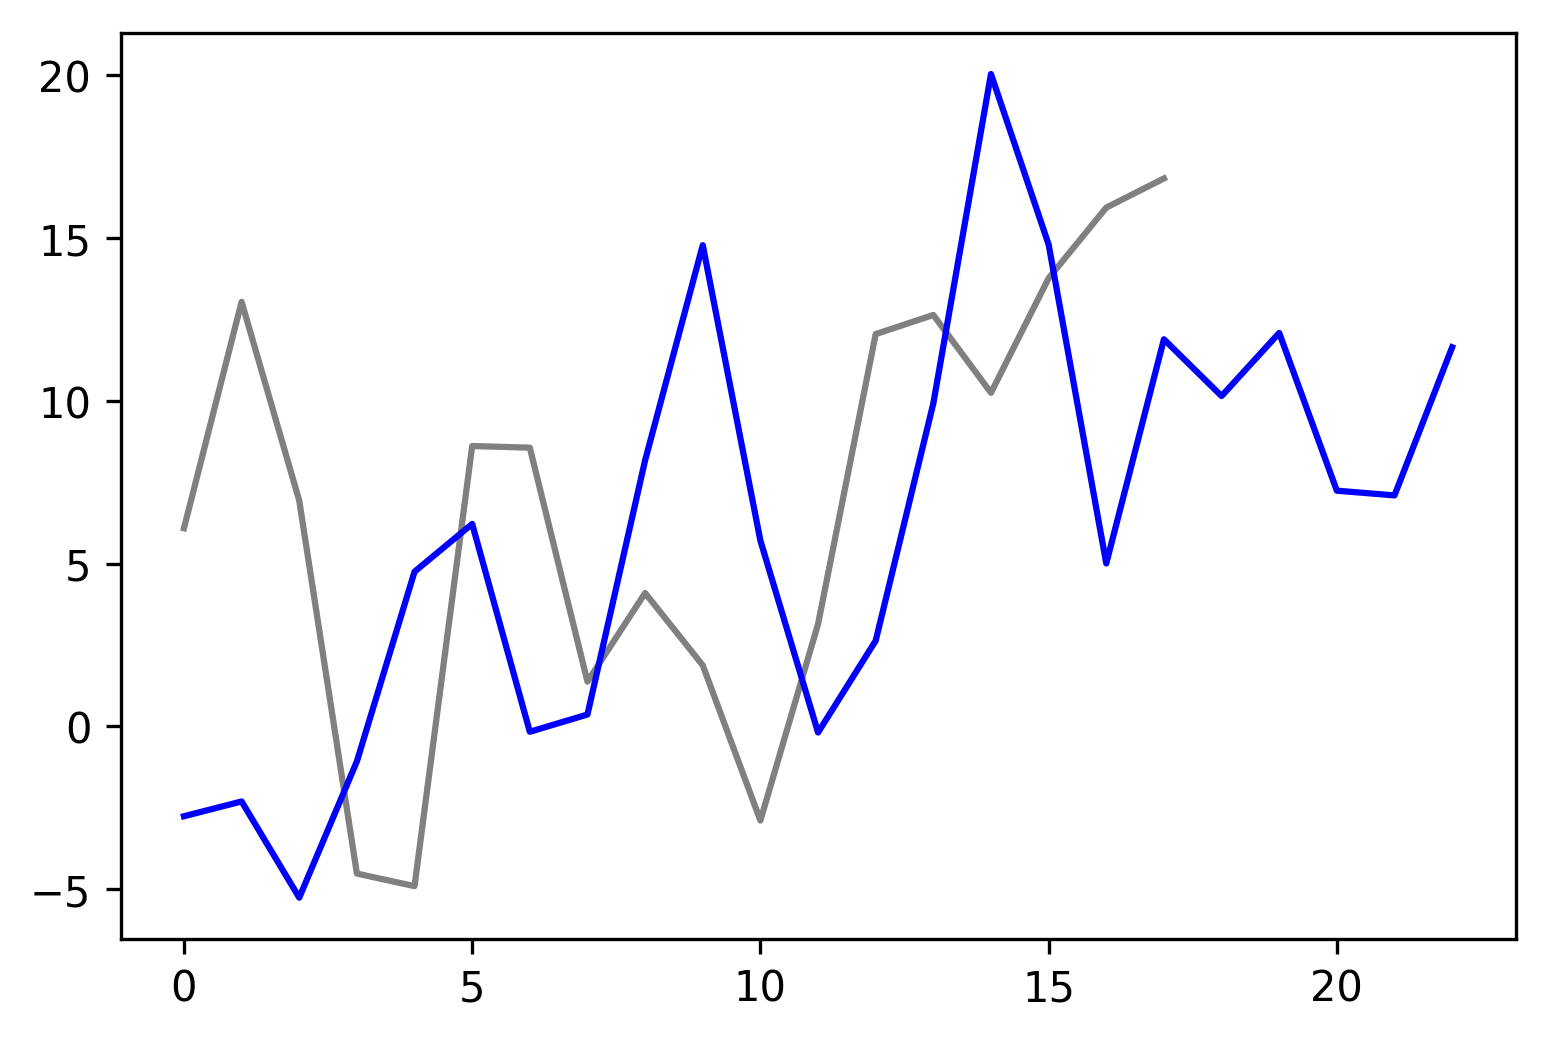

In [22]:
plt.plot(base_oat_daily_interval.as_matrix(columns = ['c']), color = 'gray')
plt.plot(rl_oat_daily_all.as_matrix(columns = ['c']), color = 'blue')

In [54]:
base_oat_month_mean = np.mean(base_oat_daily_interval.as_matrix(columns = ['c']))
rl_oat_month_mean = np.mean(rl_oat_daily_all.as_matrix(columns = ['c']))

In [56]:
print (base_oat_month_mean, rl_oat_month_mean, (rl_oat_month_mean-base_oat_month_mean)/base_oat_month_mean)

6.827213918925987 5.142113870560897 -0.2468210412586836
